In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D 

import sympy as sym

In [4]:
data = pd.read_csv('data.csv', sep='\t', index_col=0, header=0)
data.columns = data.columns.values.astype(np.float64)
data

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2
0.0,5.0000,4.0937,3.3516,2.7441,2.2466,1.8394,1.5060,1.2330,1.0095,0.8265,0.6767,0.5540,0.4536
0.1,3.7041,3.0327,2.4829,2.0328,1.6644,1.3627,1.1157,0.9134,0.7478,0.6123,0.5013,0.4104,0.3360
0.2,2.7441,2.2466,1.8394,1.5060,1.2330,1.0095,0.8265,0.6767,0.5540,0.4536,0.3714,0.3041,0.2489
0.3,2.0328,1.6644,1.3627,1.1157,0.9134,0.7478,0.6123,0.5013,0.4104,0.3360,0.2751,0.2252,0.1844
0.4,1.5060,1.2330,1.0095,0.8265,0.6767,0.5540,0.4536,0.3714,0.3041,0.2489,0.2038,0.1669,0.1366
0.5,1.1157,0.9134,0.7478,0.6123,0.5013,0.4104,0.3360,0.2751,0.2252,0.1844,0.1510,0.1236,0.1012
0.6,0.8265,0.6767,0.5540,0.4536,0.3714,0.3041,0.2489,0.2038,0.1669,0.1366,0.1119,0.0916,0.0750
0.7,0.6123,0.5013,0.4104,0.3360,0.2751,0.2252,0.1844,0.1510,0.1236,0.1012,0.0829,0.0678,0.0555
0.8,0.4536,0.3714,0.3041,0.2489,0.2038,0.1669,0.1366,0.1119,0.0916,0.0750,0.0614,0.0503,0.0411
0.9,0.3360,0.2751,0.2252,0.1844,0.1510,0.1236,0.1012,0.0829,0.0678,0.0555,0.0455,0.0372,0.0305


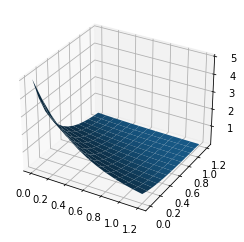

In [5]:
x = Y = list(map(float, data.columns.values))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, Y)

ax.plot_surface(X, Y, data)


## Задание 1

Построить алгоритм и программу для вычисления двукратного интеграла:

$$
  I=\iint_G f(x,y)dxdy
$$

Ограниченной прямыми:
$$ x + y = 1 $$
$$ x = 0 $$ 
$$ y = 0 $$ 

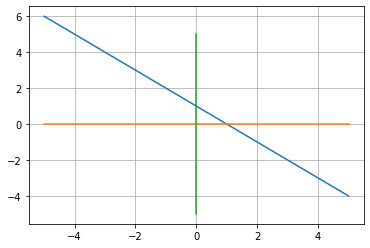

In [6]:
x = np.linspace(-5, 5, 10)
plt.plot(x, 1 - x)
plt.plot(x, np.zeros_like(x))
plt.plot(np.zeros_like(x), x)
plt.grid()

In [7]:
a = 0
b = 1

def psi(x):
    return 1 - x

def fi(x):
    return 0

Полином Лежандра получаем по формуле Родрига:
$$
\displaystyle P_{n}(z)={\frac {1}{2^{n}n!}}{\frac {d^{n}}{dz^{n}}}(z^{2}-1)^{n}.
$$

In [8]:
def get_legendre_poly(n):
    x = sym.symbols("x")
    func = f"(x**2-1)**{n} / (2 ** {n})"
    func = sym.sympify(func)
    func = func / sym.factorial(n)
    return sym.Derivative(func, (x, n)).doit()


In [9]:
def get_gauss_cofs(roots):
    matrix = np.array([roots ** i for i in range(len(roots))], dtype="float")
    b = np.array([0 if i % 2 != 0 else 2 / (i + 1) for i in range(len(roots))], dtype="float")
    
    return np.linalg.solve(matrix, b)

In [10]:
def count_integral_gauss(a, b, func, N):
    legendre_poly = get_legendre_poly(N)
    roots = np.array(sym.solve(legendre_poly.doit(), sym.Symbol('x')), dtype=np.float64)
    coffs = get_gauss_cofs(roots)
    
    x = (b + a) / 2 + (b - a) / 2 * roots
    fx = func(x)
    
    return (b - a) / 2 * fx @ coffs 

In [11]:
def count_integral_simpson(a, b, func, n):
    N = 2 * n
    x = (b - a)
    
    steps = [x / N * i for i in range(N + 1)]

    h = x / N

    s1 = 2 * np.sum([func(steps[2 * j]) for j in range(1, N // 2)])
    s2 = 4 * np.sum([func(steps[2 * j - 1]) for j in range(1, N // 2 + 1)])

    return h / 3 * (func(steps[0]) + s1 + s2 + func(steps[N]))

Посмотрим, как поведет себя введение выравнивающих переменных.

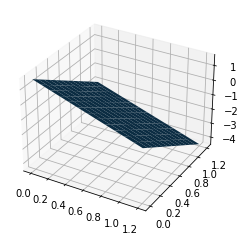

In [12]:
x = y = list(map(float, data.columns.values))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, np.log(data))

Отлично, замена $ \eta = \ln z $, привела заданную функцию к плоскости, поэтому апроксимацию будем проводить полиномом 1й степени.

In [13]:
class Plane:
    def __init__(self, data):
        Y = np.array(data.index)
        X = np.array(data.columns.values)
        matrix = np.array(
            [[1, X[0], Y[0]],
            [1, X[-1], Y[-1]],
            [1, X[0], Y[-1]]]
            )
        
        b = np.array([data[X[0]][Y[0]], data[X[-1]][Y[-1]], data[X[0]][Y[-1]]])
        
        self.coffs = np.linalg.solve(matrix, b)

    
    def get_value(self, x, y):
        return self.coffs[0] + self.coffs[1] * x + self.coffs[2] * y


In [14]:
aprox = Plane(np.log(data))

def func_1(x, y):
   # print(aprox.get_value(x, y))
    return np.exp(aprox.get_value(x, y))


def solution(a, b, fi, psi, n1 = 10, n2 = 10):
    def wrap(y):
        def func_split(x):
            return func_1(x, y)
        return count_integral_gauss(fi(y), psi(y), func_split, n1)
    
    return count_integral_simpson(a, b, wrap, n2)
   
    
solution(a, b, fi, psi)

0.5780483678560145

In [15]:
solution(a, b, fi, psi, 20, 20)

0.5780462920220513

In [34]:
temp_x = np.linspace(5, 30, 10)
temp_y = [solution(a, b, fi, psi, int(i)) for i in temp_x]
plt.plot(temp_x, temp_y)

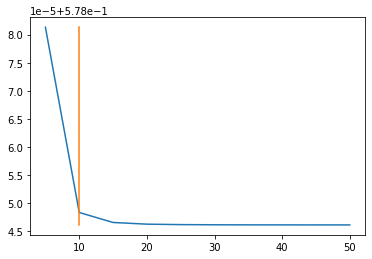

In [33]:
plt.plot(temp_x, temp_y)
plt.plot([10] * len(temp_x), temp_y)

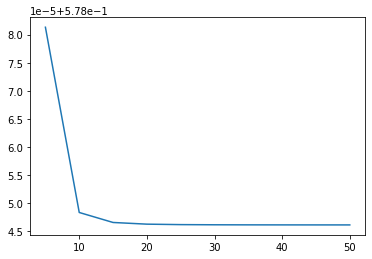

In [30]:
temp_x = np.linspace(5, 50, 10)
temp_y = [solution(a, b, fi, psi, int(i), int(i)) for i in temp_x]
plt.plot(temp_x, temp_y)

In [31]:
temp_y[-1]

0.5780461568880787

## Задание 2

Задана табличная (сеточная) функция. Имеется информация, что закономерность, 
представленная этой таблицей, может быть описана формулой

$$ 
y = \frac{a_0 * x}{a_1 + a_2 * x}
$$

In [18]:
x = np.array([i for i in range(1, 7)])
data_2 = np.array([0.571, 0.889, 1.091, 1.231, 1.333, 1.412])

In [19]:
def der(a, b, h):
    return (a - b) / h

In [20]:
h = (x[1] - x[0])
one_side_ders = [der(data_2[i], data_2[i - 1], h) for i in range(1, len(data_2))]
one_side_ders

[0.31800000000000006,
 0.20199999999999996,
 0.14000000000000012,
 0.10199999999999987,
 0.07899999999999996]

In [21]:
center_ders = [der(data_2[i+1], data_2[i-1], 2 * h) for i in range(1, len(data_2) - 1)]
center_ders

[0.26, 0.17100000000000004, 0.121, 0.09049999999999991]

In [22]:
def runge(y, h, i):
    
    f1 = (y[i] - y[i - 1]) / h
    f2 = (y[i] - y[i - 2]) / (2 * h)
    
    return f1 + (f1 - f2) / (2 ** 1 - 1)    

In [23]:
runge_ders = [runge(data_2, h, i) for i in range(2, len(data_2))]
runge_ders

[0.1439999999999999, 0.10900000000000021, 0.08299999999999974, 0.0675]

Попробуем ввести выравнивающую переменную:

$$
\frac{1}{y} = \frac{a_1}{a_0} * \frac{1}{x} + \frac{a_2}{a_0}
$$

Пусть $ \xi(x)=\frac{1}{x} $, $ \eta(y)=\frac{1}{y} $, $ c=\frac{a_1}{a_0} $ и $ d = \frac{a_2}{a_0} $,

Тогда:

$$
    \eta = c*\xi + d
$$

И следовательно:

$ \xi_x' = -\frac{1}{x^2} $ и $ \eta_y' = -\frac{1}{y^2} $

$$ y_x' = \eta_\xi' * \frac{\xi_x'}{\eta_y'} $$

In [24]:
def leveling_vars(y, x):
    eta = 1 / y
    xi = 1 / x
    eta_der_by_xi = [(eta[i+1] - eta[i]) / (xi[i + 1] - xi[i]) for i in range(len(xi) - 1)]
    y_der = [eta_der_by_xi[i] * y[i] ** 2 / x[i] ** 2 for i in range(len(eta_der_by_xi))]
    
    return y_der

In [25]:
leveling = leveling_vars(data_2, x)
leveling

[0.4084994375703037,
 0.2468991750687442,
 0.1654373138369891,
 0.11774381095273803,
 0.0894960339943342]

#### Вторая разностная производная

$$ y'' = \frac{y_{n-1} - 2 * y_n + y_{n+1}}{h^2} $$

In [26]:
def second_der(yn1, yn2, yn3, h):
    return (yn1 - 2 * yn2 + yn3) / h ** 2

In [27]:
second_ders = [second_der(data_2[i - 1], data_2[i], data_2[i + 1], h) for i in range(1, len(data_2) - 1)]
second_ders

[-0.1160000000000001,
 -0.06199999999999983,
 -0.038000000000000256,
 -0.02299999999999991]

#### Результат

In [28]:
df = pd.DataFrame()
df['y'] = data_2
df['Односторонняя производная'] = ['*'] + list(map(lambda x : round(x, 3), one_side_ders))
df['Центральная производная'] =  ['*'] + list(map(lambda x : round(x, 3), center_ders))  + ['*']
df['2я формула Рунге'] = ['*'] + ['*'] +list(map(lambda x : round(x, 3), runge_ders))
df['Выравнивающие переменные'] = list(map(lambda x : round(x, 3), leveling)) + ['*']
df['Вторая производная'] = ['*'] +list(map(lambda x : round(x, 3), second_ders)) + ['*']

df

,y,Односторонняя производная,Центральная производная,2я формула Рунге,Выравнивающие переменные,Вторая производная
0,0.571,*,*,*,0.408,*
1,0.889,0.318,0.26,*,0.247,-0.116
2,1.091,0.202,0.171,0.144,0.165,-0.062
3,1.231,0.14,0.121,0.109,0.118,-0.038
4,1.333,0.102,0.09,0.083,0.089,-0.023
5,1.412,0.079,*,0.068,*,*
